#**Statistics Advanced - 2**

1. What is hypothesis testing in statistics?

  -> Hypothesis testing is a statistical method used to make decisions or draw conclusions about a population based on sample data.

2. What is the null hypothesis, and how does it differ from the alternative
hypothesis?

   -> The null hypothesis (H₀) states that there is no significant effect, relationship, or difference between variables, while the alternative hypothesis (H₁ or Hₐ) proposes that a statistically significant effect, relationship, or difference does exist. The main difference is that the null hypothesis is a statement of the default or baseline assumption of no effect, which the researcher tries to disprove, whereas the alternative hypothesis is the researcher's prediction or claim that they are trying to prove.  

3. Explain the significance level in hypothesis testing and its role in deciding the outcome of a test.

  -> The significance level (alpha, α) in hypothesis testing is the researcher-set probability of rejecting a true null hypothesis, also known as a Type I error. It serves as the decision threshold: if the p-value from the test is less than α, the null hypothesis is rejected, indicating a statistically significant result; otherwise, it is not rejected. A lower α requires stronger evidence to reject the null hypothesis, while a higher α allows for less evidence but increases the risk of a Type I error.

4. What are Type I and Type II errors? Give examples of each.

   -> Type I and Type II errors are mistakes in hypothesis testing. A Type I error is a false positive (incorrectly rejecting a true null hypothesis), like concluding a drug is effective when it's not. A Type II error is a false negative (failing to reject a false null hypothesis), such as failing to identify a drug as effective when it actually is.  

5. What is the difference between a Z-test and a T-test? Explain when to use
each.

   -> A Z-test is used when the population standard deviation is known and the sample size is large (typically n ≥ 30), while a T-test is used when the population standard deviation is unknown and the sample size is small (typically n < 30). The choice depends on whether you know the population's true spread (standard deviation) or are estimating it from your sample, with the T-test being more appropriate for small samples to account for the added uncertainty.

6. Write a Python program to generate a binomial distribution with n=10 and
p=0.5, then plot its histogram.

   ->

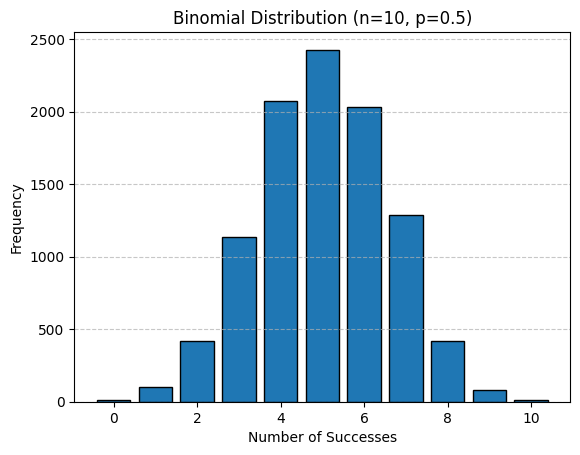

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n = 10   # number of trials
p = 0.5  # probability of success
size = 10000  # number of samples

# Generate binomial distribution
data = np.random.binomial(n, p, size)

# Plot histogram
plt.hist(data, bins=np.arange(-0.5, n+1.5, 1), edgecolor='black', rwidth=0.8)
plt.title(f'Binomial Distribution (n={n}, p={p})')
plt.xlabel('Number of Successes')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


7. Implement hypothesis testing using Z-statistics for a sample dataset in
Python. Show the Python code and interpret the results.
sample_data = [49.1, 50.2, 51.0, 48.7, 50.5, 49.8, 50.3, 50.7, 50.2, 49.6,
50.1, 49.9, 50.8, 50.4, 48.9, 50.6, 50.0, 49.7, 50.2, 49.5,
50.1, 50.3, 50.4, 50.5, 50.0, 50.7, 49.3, 49.8, 50.2, 50.9,
50.3, 50.4, 50.0, 49.7, 50.5, 49.9]

In [2]:
import numpy as np
import scipy.stats as stats

# Sample data
sample_data = [49.1, 50.2, 51.0, 48.7, 50.5, 49.8, 50.3, 50.7, 50.2, 49.6,
               50.1, 49.9, 50.8, 50.4, 48.9, 50.6, 50.0, 49.7, 50.2, 49.5,
               50.1, 50.3, 50.4, 50.5, 50.0, 50.7, 49.3, 49.8, 50.2, 50.9,
               50.3, 50.4, 50.0, 49.7, 50.5, 49.9]

# Step 1: Calculate sample statistics
sample_mean = np.mean(sample_data)
sample_std = np.std(sample_data, ddof=1)  # sample standard deviation
n = len(sample_data)

# Step 2: Define null hypothesis mean
mu_0 = 50

# Step 3: Compute Z-statistic
z_stat = (sample_mean - mu_0) / (sample_std / np.sqrt(n))

# Step 4: Compute p-value (two-tailed test)
p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))

print(f"Sample mean: {sample_mean:.3f}")
print(f"Sample std dev: {sample_std:.3f}")
print(f"Z-statistic: {z_stat:.3f}")
print(f"P-value: {p_value:.4f}")

# Step 5: Decision
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Significant difference from population mean.")
else:
    print("Fail to reject the null hypothesis: No significant difference from population mean.")


Sample mean: 50.089
Sample std dev: 0.537
Z-statistic: 0.994
P-value: 0.3202
Fail to reject the null hypothesis: No significant difference from population mean.


8. Write a Python script to simulate data from a normal distribution and
calculate the 95% confidence interval for its mean. Plot the data using Matplotlib.


Sample Mean: 49.481
95% Confidence Interval: (48.591, 50.371)


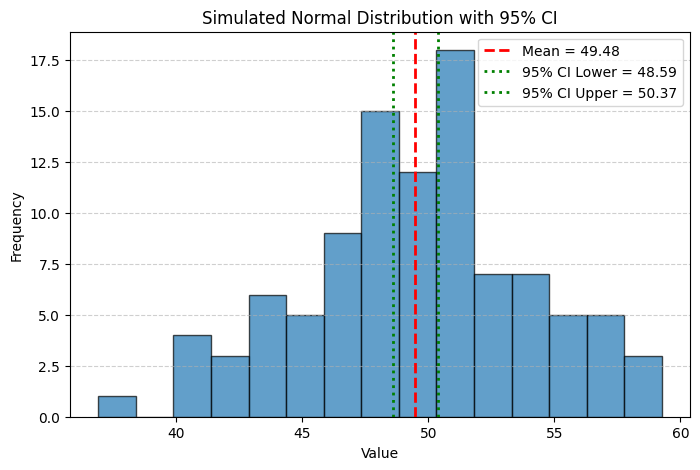

In [3]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Step 1: Simulate data
np.random.seed(42)  # for reproducibility
mu = 50      # true mean
sigma = 5    # true standard deviation
n = 100      # sample size

data = np.random.normal(mu, sigma, n)

# Step 2: Calculate sample statistics
sample_mean = np.mean(data)
sample_std = np.std(data, ddof=1)

# Step 3: Calculate 95% confidence interval for the mean
alpha = 0.05
z_critical = stats.norm.ppf(1 - alpha/2)  # 1.96 for 95% CI
margin_of_error = z_critical * (sample_std / np.sqrt(n))
ci_lower = sample_mean - margin_of_error
ci_upper = sample_mean + margin_of_error

print(f"Sample Mean: {sample_mean:.3f}")
print(f"95% Confidence Interval: ({ci_lower:.3f}, {ci_upper:.3f})")

# Step 4: Plot the data
plt.figure(figsize=(8, 5))
plt.hist(data, bins=15, edgecolor='black', alpha=0.7)
plt.axvline(sample_mean, color='red', linestyle='dashed', linewidth=2, label=f"Mean = {sample_mean:.2f}")
plt.axvline(ci_lower, color='green', linestyle='dotted', linewidth=2, label=f"95% CI Lower = {ci_lower:.2f}")
plt.axvline(ci_upper, color='green', linestyle='dotted', linewidth=2, label=f"95% CI Upper = {ci_upper:.2f}")

plt.title("Simulated Normal Distribution with 95% CI")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


9. Write a Python function to calculate the Z-scores from a dataset and
visualize the standardized data using a histogram. Explain what the Z-scores represent in terms of standard deviations from the mean.


Z-scores:
[-1.4603228   0.30490256  1.58870283 -2.10222294  0.78632766 -0.33699757
  0.4653776   1.10727773  0.30490256 -0.65794764  0.14442753 -0.17652254
  1.26775276  0.62585263 -1.78127287  0.9468027  -0.0160475  -0.4974726
  0.30490256 -0.81842267]


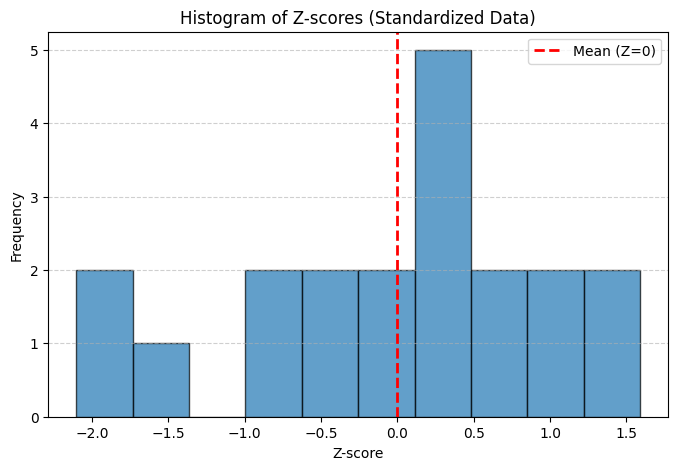

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_and_plot_zscores(data):
    """
    Calculate Z-scores for the dataset and plot a histogram.

    Parameters:
        data (list or np.ndarray): Input dataset.
    """
    data = np.array(data)

    # Step 1: Calculate mean and standard deviation
    mean = np.mean(data)
    std_dev = np.std(data, ddof=1)

    # Step 2: Calculate Z-scores
    z_scores = (data - mean) / std_dev

    # Step 3: Print Z-scores
    print("Z-scores:")
    print(z_scores)

    # Step 4: Plot histogram of Z-scores
    plt.figure(figsize=(8, 5))
    plt.hist(z_scores, bins=10, edgecolor='black', alpha=0.7)
    plt.axvline(0, color='red', linestyle='dashed', linewidth=2, label="Mean (Z=0)")
    plt.title("Histogram of Z-scores (Standardized Data)")
    plt.xlabel("Z-score")
    plt.ylabel("Frequency")
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.show()

# Example usage
sample_data = [49.1, 50.2, 51.0, 48.7, 50.5, 49.8, 50.3, 50.7, 50.2, 49.6,
               50.1, 49.9, 50.8, 50.4, 48.9, 50.6, 50.0, 49.7, 50.2, 49.5]
calculate_and_plot_zscores(sample_data)
